### TensorFlow Regression

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

**Creating a fake dataset... with a bit of noise**

In [2]:
x_data = np.linspace(0.0,10,1000000)

In [3]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [4]:
y_true = (0.5 * x_data) + 5 + noise

Creating a dataframe with this values

In [5]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [6]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [7]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [8]:
y_df.head()

,Y
0,2.731193
1,5.324386
2,4.853876
3,5.679218
4,4.833278


In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,X Data,Y
0,0.00000,2.731193
1,0.00001,5.324386
2,0.00002,4.853876
3,0.00003,5.679218
4,0.00004,4.833278


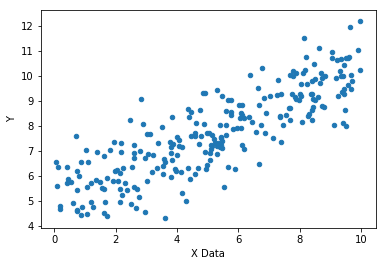

In [11]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [12]:
batch_size = 8

In [13]:
np.random.randn(2)

array([-0.66465703,  1.39086775])

In [14]:
m = tf.Variable(1.26)
b = tf.Variable(1.07)

In [15]:
xph = tf.placeholder(tf.float32,[batch_size])

In [16]:
yph = tf.placeholder(tf.float32,[batch_size])

In [17]:
y_model = m*xph + b

In [18]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [22]:
model_m

0.51397127

In [23]:
model_b

4.969829

In [24]:
y_hat = x_data*model_m + model_b

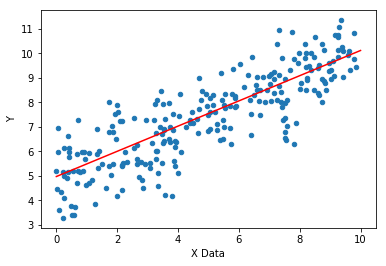

In [25]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

### Estimator TensorFlow API

tf.estimator
   - tf.estimator.LinearClassifier
        - constructs a linear classification
        
   - tf.estimator.LinearRegressor
        - Construct a linear regressor model

   - tf.estimator.DNNClassifier
        - Construct a NN classification model
    
   - tf.estimator.DNNRegresor
        - Construct a NN regresor model

etc...

General use of Estimator API:
- Define a list of feature columns
- Create the estimator model
- Create a DAta Input Function
- Call train, evaluate, and predict methods on the estimator object

In [26]:
 feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [27]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_train_distribute': None, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmppaaogaim', '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f46cbc61160>, '_device_fn': None, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_service': None, '_task_id': 0, '_session_config': None, '_master': '', '_is_chief': True, '_task_type': 'worker', '_num_ps_replicas': 0, '_save_checkpoints_steps': None}


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [30]:
x_train.shape

(700000,)

In [31]:
x_eval.shape

(300000,)

In [32]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [54]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [55]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [56]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpe8u56tbq/model.ckpt.
INFO:tensorflow:loss = 462.2165, step = 1
INFO:tensorflow:global_step/sec: 517.744
INFO:tensorflow:loss = 10.85707, step = 101 (0.193 sec)
INFO:tensorflow:global_step/sec: 999.35
INFO:tensorflow:loss = 18.448782, step = 201 (0.101 sec)
INFO:tensorflow:global_step/sec: 1070.79
INFO:tensorflow:loss = 12.942649, step = 301 (0.093 sec)
INFO:tensorflow:global_step/sec: 1075.84
INFO:tensorflow:loss = 11.164, step = 401 (0.093 sec)
INFO:tensorflow:global_step/sec: 1086.12
INFO:tensorflow:loss = 12.796347, step = 501 (0.092 sec)
INFO:tensorflow:global_step/sec: 1040.17
INFO:tensorflow:loss = 15.227436, step = 601 (0.096 sec)
INFO:tensorflow:global_step/sec: 1115.25
INFO:tensorflow:loss =

In [58]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-06-23:23:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpe8u56tbq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-06-23:23:34
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0764612, global_step = 1000, label/mean = 7.4945827, loss = 8.61169, prediction/mean = 7.3032417
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [59]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-06-23:24:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpe8u56tbq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-06-23:24:46
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.093843, global_step = 1000, label/mean = 7.4832997, loss = 8.750744, prediction/mean = 7.2826104
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [60]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'prediction/mean': 7.3032417, 'label/mean': 7.4945827, 'global_step': 1000, 'loss': 8.61169, 'average_loss': 1.0764612}


In [61]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'prediction/mean': 7.2826104, 'label/mean': 7.4832997, 'global_step': 1000, 'loss': 8.750744, 'average_loss': 1.093843}


In [62]:
brand_new_data = np.linspace(0,10,10)

In [63]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [66]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpe8u56tbq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.446085], dtype=float32)},
 {'predictions': array([5.0807233], dtype=float32)},
 {'predictions': array([5.715362], dtype=float32)},
 {'predictions': array([6.3500004], dtype=float32)},
 {'predictions': array([6.984639], dtype=float32)},
 {'predictions': array([7.619277], dtype=float32)},
 {'predictions': array([8.253916], dtype=float32)},
 {'predictions': array([8.888554], dtype=float32)},
 {'predictions': array([9.523193], dtype=float32)},
 {'predictions': array([10.157831], dtype=float32)}]

In [67]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpe8u56tbq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


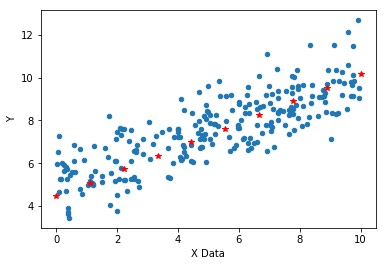

In [68]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')